In [1]:
from torchdiffeq import odeint_adjoint as odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch 

In [2]:
#Instantiate functions to compute activation and repression
def activation(x, k, theta, n):
    return (k*(x/theta)**n)/(1+(x/theta)**n)

def repression(x, k, theta, n):
    return k/(1+(x/theta)**n)

def nonlinearity(x, kc, km):
    return (kc*x)/(km+x)

In [3]:
def dual_control(t, y):
    ydot = torch.zeros(6)
    ydot[0] = Vin - lam*y[0] - e0*nonlinearity(y[0], kc, km) - lam*y[1]
    ydot[1] = y[2]*nonlinearity(y[0], kc, km) - y[3]*nonlinearity(y[1], kc, km) - lam*y[1]
    ydot[2] = repression(y[1], k1, theta1, n1) - lam*y[2]
    ydot[3] = activation(y[1], k2, theta2, n2) - lam*y[3]
    ydot[4] = (Vin -  y[3]*nonlinearity(y[1], kc, km))**2
    ydot[5] = repression(y[1], k1, theta1, n1) + activation(y[1], k2, theta2, n2)
    return ydot

In [4]:
#Times
t = torch.from_numpy(np.linspace(1,5e4,200))
#Constants
Vin = 1
e0 = 0.0467 
lam = 1.93E-4 #1/s
#Assume equal kinetics for all three enzymes
kc = 12 #1/s
km = 10 
#Initial conditions
y0 = torch.from_numpy(np.array([2290., 0., 0., 0., 0., 0.]))
labels = ['theta', 'k1', 'k2', 'x0', 'x1', 'e1', 'e2', 'j1', 'j2', 'v2']

n1 = 2
n2 = 2
num_points = 10
thetas = [1]
ks = np.linspace(1E-7, 0.001, num_points)

In [5]:
ss_data = pd.DataFrame(columns=labels)
for theta1 in thetas:
    theta2 = theta1
    for k1 in ks:
        for k2 in ks:
            print('Solving equation with parameters: ', theta1, k1, k2)
            solution = odeint(dual_control, y0, t, adjoint_params=())
            x0, x1, e1, e2, j1, j2 = solution[-1]
            v2 = e2*nonlinearity(x1, kc, km)
            row = [theta1, k1, k2, x0, x1, e1, e2, j1, j2, v2]
            ss_data.loc[len(ss_data)] = row

Solving equation with parameters:  1 1e-07 1e-07
Solving equation with parameters:  1 1e-07 0.00011119999999999999
Solving equation with parameters:  1 1e-07 0.00022229999999999998
Solving equation with parameters:  1 1e-07 0.00033339999999999997
Solving equation with parameters:  1 1e-07 0.00044449999999999996
Solving equation with parameters:  1 1e-07 0.0005556
Solving equation with parameters:  1 1e-07 0.0006666999999999999
Solving equation with parameters:  1 1e-07 0.0007777999999999998
Solving equation with parameters:  1 1e-07 0.0008888999999999999
Solving equation with parameters:  1 1e-07 0.001
Solving equation with parameters:  1 0.00011119999999999999 1e-07
Solving equation with parameters:  1 0.00011119999999999999 0.00011119999999999999
Solving equation with parameters:  1 0.00011119999999999999 0.00022229999999999998
Solving equation with parameters:  1 0.00011119999999999999 0.00033339999999999997
Solving equation with parameters:  1 0.00011119999999999999 0.0004444999999

KeyboardInterrupt: 

In [6]:
ss_data.to_csv('torchode_results_loss.csv')

In [8]:
ss_data

,theta,k1,k2,x0,x1,e1,e2,j1,j2,v2
0,1,1.000000e-07,1.000000e-07,"tensor(2288.3401, dtype=torch.float64)","tensor(2.0137, dtype=torch.float64)","tensor(0.0001, dtype=torch.float64)","tensor(0.0004, dtype=torch.float64)","tensor(49924.1839, dtype=torch.float64)","tensor(0.0050, dtype=torch.float64)","tensor(0.0008, dtype=torch.float64)"
1,1,1.000000e-07,1.112000e-04,"tensor(2290.1353, dtype=torch.float64)","tensor(0.2086, dtype=torch.float64)","tensor(0.0005, dtype=torch.float64)","tensor(0.0240, dtype=torch.float64)","tensor(49473.0878, dtype=torch.float64)","tensor(0.2363, dtype=torch.float64)","tensor(0.0059, dtype=torch.float64)"
2,1,1.000000e-07,2.223000e-04,"tensor(2290.1782, dtype=torch.float64)","tensor(0.1654, dtype=torch.float64)","tensor(0.0005, dtype=torch.float64)","tensor(0.0307, dtype=torch.float64)","tensor(49463.8902, dtype=torch.float64)","tensor(0.3006, dtype=torch.float64)","tensor(0.0060, dtype=torch.float64)"
3,1,1.000000e-07,3.334000e-04,"tensor(2290.1991, dtype=torch.float64)","tensor(0.1445, dtype=torch.float64)","tensor(0.0005, dtype=torch.float64)","tensor(0.0353, dtype=torch.float64)","tensor(49460.0357, dtype=torch.float64)","tensor(0.3453, dtype=torch.float64)","tensor(0.0060, dtype=torch.float64)"
4,1,1.000000e-07,4.445000e-04,"tensor(2290.2123, dtype=torch.float64)","tensor(0.1312, dtype=torch.float64)","tensor(0.0005, dtype=torch.float64)","tensor(0.0390, dtype=torch.float64)","tensor(49457.8199, dtype=torch.float64)","tensor(0.3808, dtype=torch.float64)","tensor(0.0061, dtype=torch.float64)"
5,1,1.000000e-07,5.556000e-04,"tensor(2290.2216, dtype=torch.float64)","tensor(0.1218, dtype=torch.float64)","tensor(0.0005, dtype=torch.float64)","tensor(0.0421, dtype=torch.float64)","tensor(49456.3480, dtype=torch.float64)","tensor(0.4106, dtype=torch.float64)","tensor(0.0061, dtype=torch.float64)"
6,1,1.000000e-07,6.667000e-04,"tensor(2290.2288, dtype=torch.float64)","tensor(0.1146, dtype=torch.float64)","tensor(0.0005, dtype=torch.float64)","tensor(0.0448, dtype=torch.float64)","tensor(49455.2844, dtype=torch.float64)","tensor(0.4366, dtype=torch.float64)","tensor(0.0061, dtype=torch.float64)"
7,1,1.000000e-07,7.778000e-04,"tensor(2290.2345, dtype=torch.float64)","tensor(0.1088, dtype=torch.float64)","tensor(0.0005, dtype=torch.float64)","tensor(0.0472, dtype=torch.float64)","tensor(49454.4723, dtype=torch.float64)","tensor(0.4599, dtype=torch.float64)","tensor(0.0061, dtype=torch.float64)"
8,1,1.000000e-07,8.889000e-04,"tensor(2290.2392, dtype=torch.float64)","tensor(0.1041, dtype=torch.float64)","tensor(0.0005, dtype=torch.float64)","tensor(0.0494, dtype=torch.float64)","tensor(49453.8275, dtype=torch.float64)","tensor(0.4810, dtype=torch.float64)","tensor(0.0061, dtype=torch.float64)"
9,1,1.000000e-07,1.000000e-03,"tensor(2290.2432, dtype=torch.float64)","tensor(0.1001, dtype=torch.float64)","tensor(0.0005, dtype=torch.float64)","tensor(0.0514, dtype=torch.float64)","tensor(49453.3002, dtype=torch.float64)","tensor(0.5004, dtype=torch.float64)","tensor(0.0061, dtype=torch.float64)"


ValueError: cannot reshape array of size 55 into shape (6,10)

<Figure size 432x288 with 0 Axes>

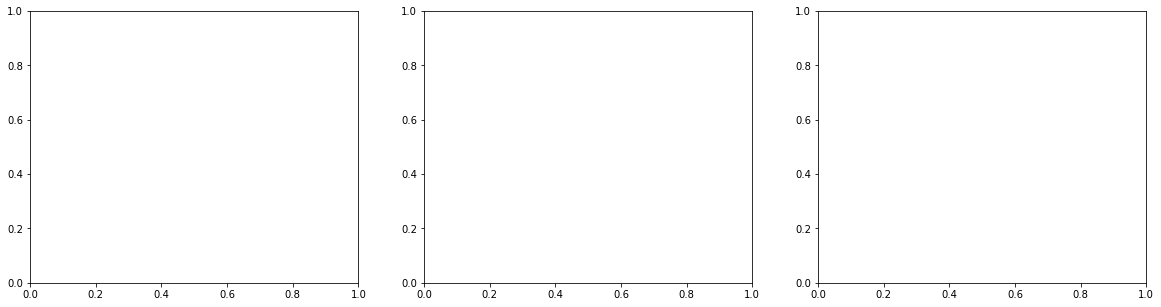

In [7]:
 
fig = plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

endpoint = 'j1'
X = ss_data.k1.unique()
Y = ss_data.k2.unique()
Z = np.array(ss_data[endpoint]).reshape((len(X), len(Y)))
   

axs[0].contourf(X,Y,Z)
axs[0].set_title(f'{endpoint}')
axs[0].set_xlabel('k1')
axs[0].set_ylabel('k2')

endpoint = 'j2'
X = ss_data.k1.unique()
Y = ss_data.k2.unique()
Z = np.array(ss_data[endpoint]).reshape((len(X), len(Y)))
   
axs[1].contourf(X,Y,Z)
axs[1].set_title(f'{endpoint}')
axs[1].set_xlabel('k1')
axs[1].set_ylabel('k2')

endpoint = 'loss'
X = ss_data.k1.unique()
Y = ss_data.k2.unique()
Z = np.array(ss_data[endpoint]).reshape((len(X), len(Y)))
   
cs = axs[2].contourf(X,Y,Z)
axs[2].set_title(f'{endpoint}')
axs[2].set_xlabel('k1')
axs[2].set_ylabel('k2')
fig.colorbar(cs)

In [ ]:
#We can instantiate a simple biological system and results match scipy solvers
#TorchDiffEQ solution
func = DualControlSingleParam()
learning_rate = 0.01
solver = 'dopri8'
int_time = 5E4
np.random.seed(2021)

#Establish initial conditions
t = torch.linspace(0, int_time, 100) 
y0 = torch.tensor([2290., 0., 0., 0., 0., 0.]) 
labels = ['theta', 'k1', 'k2', 'j1', 'j2', 'loss']

#Biological System  
class DualControlSingleParam(torch.nn.Module):
    def __init__(self, k1, k2):
        super(DualControlSingleParam, self).__init__()
        #Initialize constants, taken from Verma et al paper.
        self.Vin = 1.
        self.e0 = 0.0467
        self.lam = 1.93E-4 #1/s
        #Assume equal kinetics for all three enzymes
        self.kc = 12
        self.km = 10 #1/s
        self.W = torch.nn.Parameter(torch.tensor([k1, k2]), requires_grad=True) #n, theta, k
        self.n = 2
        self.theta = 0.1

    def forward(self, t, y):
        dx0 = self.Vin - self.lam*y[0] - self.e0*nonlinearity(y[0], self.kc, self.km) - self.lam*y[1]
        dx1 = y[2]*nonlinearity(y[0], self.kc, self.km) - y[3]*nonlinearity(y[1], self.kc, self.km) - self.lam*y[1]
        de1 = repression(y[1], self.W[0], self.theta, self.n) - self.lam*y[2]
        de2 = activation(y[1], self.W[1], self.theta, self.n) - self.lam*y[3]
        j1 = (self.Vin -  y[3]*nonlinearity(y[1], self.kc, self.km))**2
        j2 = repression(y[1], self.W[0], self.theta, self.n) + activation(y[1], self.W[1], self.theta, self.n)
        return torch.stack([dx0, dx1, de1, de2, j1, j2])